In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
file_name <- paste0("InN_inte_AllAge")
seu <- readRDS(file = paste0("./load_files/", file_name, ".harmony.rds"))


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## Set parameters
tb <- read.table("./load_files/inn.merge.ident.txt", sep="\t", 
                 stringsAsFactors=FALSE, header=TRUE, comment.char = "")
lb2col <- setNames(tb$color, tb$cluster)
reg_cols <- c("#FF420E", "#FFBB00", "#4CB5F5", "#89DA59", "#878787", "#B037C4") %>% 
            setNames(., c("FC", "MSC", "TC", "OC", "Insula", "GE"))
age_cols <- c("#8c510a", "#bf812d", "#dfc27d", "#c7eae5", "#80cdc1", "#35978f", "#01665e") %>% 
            setNames(., c("E37", "E42-43", "E54", "E62-64", "E77-78", "E93", "E110"))
col_list <- list(subtype = lb2col, 
            cbnage = age_cols,
            lobe = reg_cols)

In [3]:
pdata <- cbind(seu@meta.data[, c("subtype", "cbnage", "lobe")], seu$umap@cell.embeddings)
set.seed(42)
pdata <- pdata[sample(1:nrow(pdata)), ]

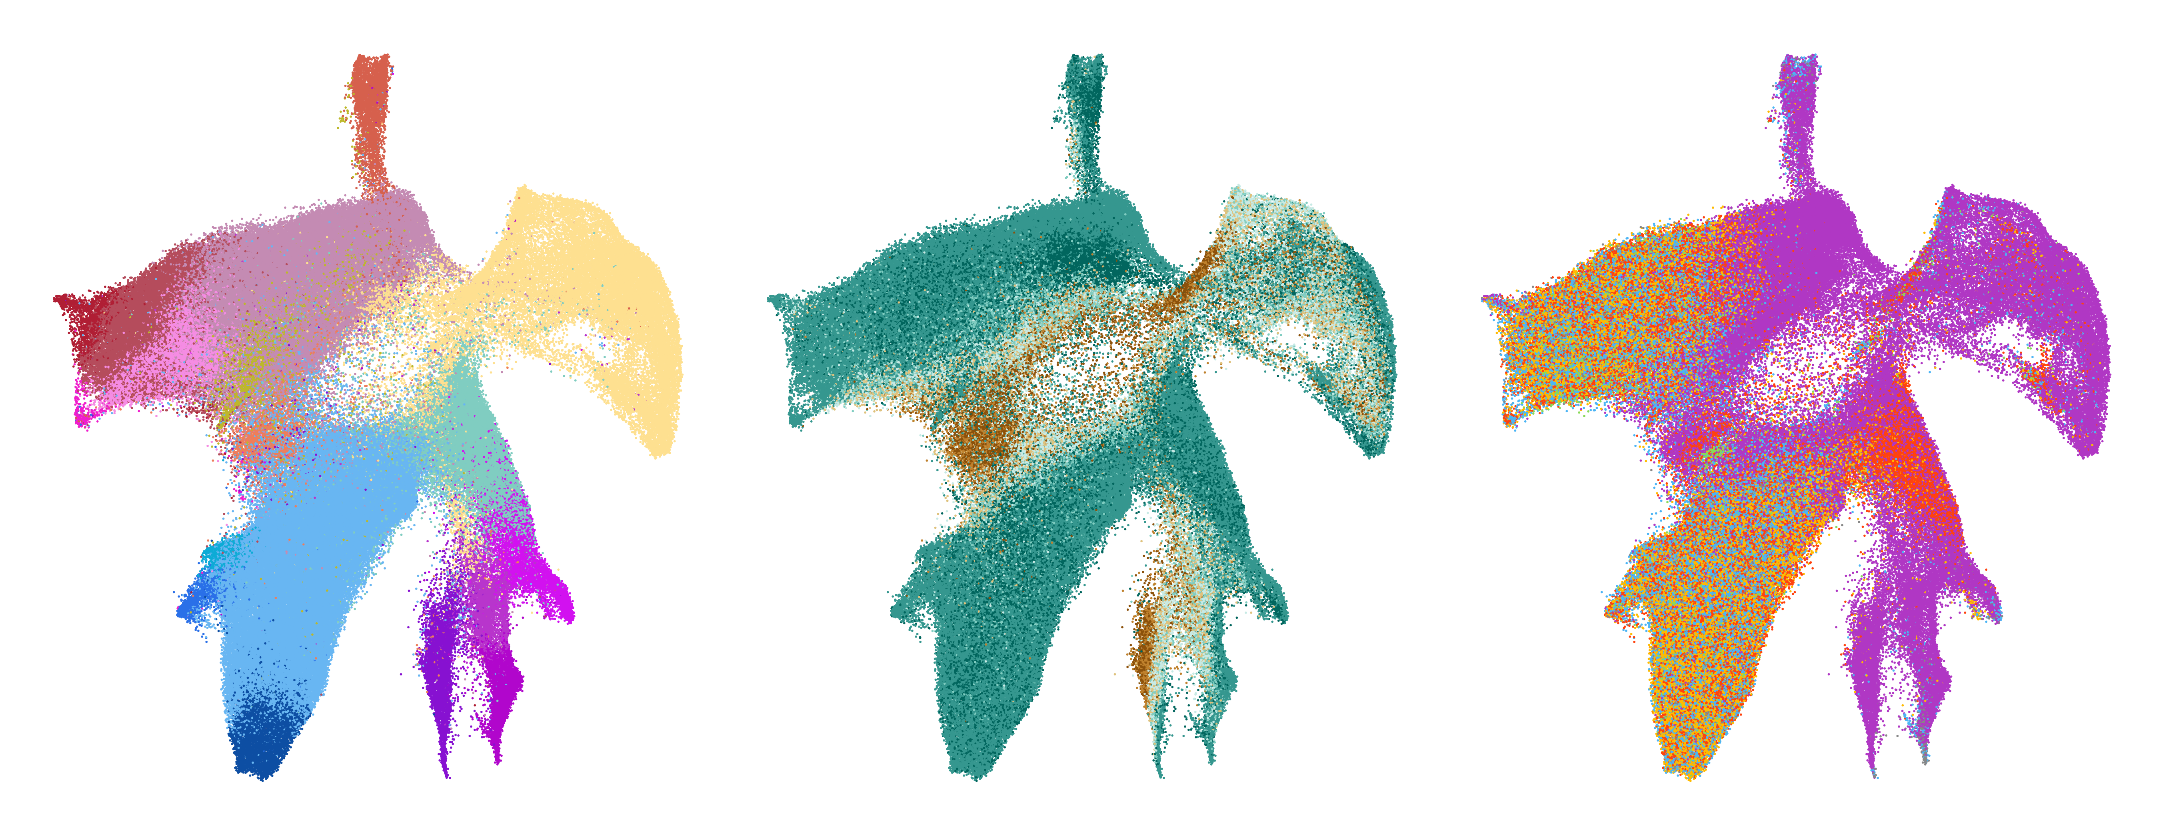

In [5]:
plist <- lapply(c("subtype", "cbnage", "lobe"), function(tp) {
p <- ggplot(pdata, aes_string(x = "UMAP_1", y = "UMAP_2", color = tp)) +
            ggrastr::rasterise(geom_point(size = 0.2, shape = 16), dpi = 300, scale = 1) +
            theme_classic() + 
            scale_color_manual(values = col_list[[tp]]) + 
            theme(legend.position = "none",
                    line = element_blank(),axis.title.x = element_blank(),axis.title.y = element_blank(),
                    axis.text.x=element_blank(),axis.text.y=element_blank(), 
                    plot.title = element_blank())
return(p)
})
pcbn <- patchwork::wrap_plots(plotlist = plist, nrow = 1, ncol = 3)
options(repr.plot.width=18, repr.plot.height=7)
pcbn

In [6]:
pdf(paste0("./report/", "Inte_InN_Allage_idents_v1.pdf"), width = 24, height = 8)
print(pcbn)
dev.off()

png 
  2

In [7]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRblas.so
LAPACK: /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_1.0.7   ggplot2_3.3.0 Seurat_3.1.5 

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RColorBrewer_1.1-2  httr_1.4.1 